In [16]:
# Importamos librerias necesarias 
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import argrelextrema
import operator
from ipywidgets import interact, IntSlider, fixed, Checkbox, FloatSlider, Button, VBox, HBox, interactive_output, widgets

In [4]:
# Cargue de imágenes seleccionadas

# Escena urbana nocturna con varias personas caminando por una acera iluminada tenuemente por luces de escaparates.
# Desafíos: Iluminación desigual, múltiples rostros en diferentes posiciones y tamaños.
img1 = cv2.imread("C:/Users/paulo/Documents/UNIR/Vision Artificial/Actividad 1/1128.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

#  Área de parque con vegetación y caminos apenas visibles debido a la falta de iluminación artificial.
# Desafíos: Oscuridad extrema, detalles faciales apenas perceptibles.
img2 = cv2.imread("C:/Users/paulo/Documents/UNIR/Vision Artificial/Actividad 1/2217.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Pasillo interior con luces fluorescentes que crean sombras pronunciadas y zonas sobreexpuestas.
# Desafíos: Contrastes fuertes, sombras que ocultan partes del rostro.
img3 = cv2.imread("C:/Users/paulo/Documents/UNIR/Vision Artificial/Actividad 1/3345.png")
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# Escena nocturna de un puente peatonal iluminado por faroles que generan puntos de luz intensos y áreas oscuras.
# Desafíos: Iluminación puntual que crea zonas de alto brillo y otras de sombra profunda
img4 = cv2.imread("C:/Users/paulo/Documents/UNIR/Vision Artificial/Actividad 1/4456.png")
img5 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

# Funciones básicas para la manipulación de imágenes
# Desplegar una imagen
def imshow(img):
  fig,ax = plt.subplots(figsize=(5,5))
  ax.imshow(img,cmap=plt.cm.gray)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()

#Aumentar el brillo de la imagen
def aumentar_brillo2(imagen, qty=8):
    suma = imagen
    for i in range(qty):
        suma = cv2.add(imagen,suma)
    return suma

#Multiplicar la imagen por si misma
def potenciar_imagen2(imagen, qty=5):
    producto = imagen
    for i in range(qty):
        producto = cv2.multiply(imagen,producto)
    return producto

#Ecualizar el histograma de la imagen
def ecualizar_histograma(imagen):
    # Convertir la imagen a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
    # Aplicar ecualización de histograma
    ecualizada = cv2.equalizeHist(gris)
    return ecualizada

def show_in_grid(image, posx, posy, title='Original', cmap='gray'):
    # Mostrar la imagen en escala de grises
    axs[posx, posy].imshow(image, cmap=cmap) 
    axs[posx, posy].set_title(title)
    axs[posx, posy].axis('off')

    # Calcular histograma con OpenCV
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    
    # Mostrar el histograma como curva
    axs[posx+1, posy].plot(hist, color='gray')
    #axs[posx+1, posy].set_title(f'Histograma {posy+1}')
    axs[posx+1, posy].set_title(f'Histograma ' + title)
    axs[posx+1, posy].set_xlim([0, 256])

In [5]:
# Convertir imágenes 1 y 2 a grises
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)



In [6]:
# Aumentar el brillo de la imagen
brillante1 = aumentar_brillo2(gray1,12)
brillante2 = aumentar_brillo2(gray2,12)
brillante3 = aumentar_brillo2(img3,20)
brillante4 = aumentar_brillo2(img4,20)



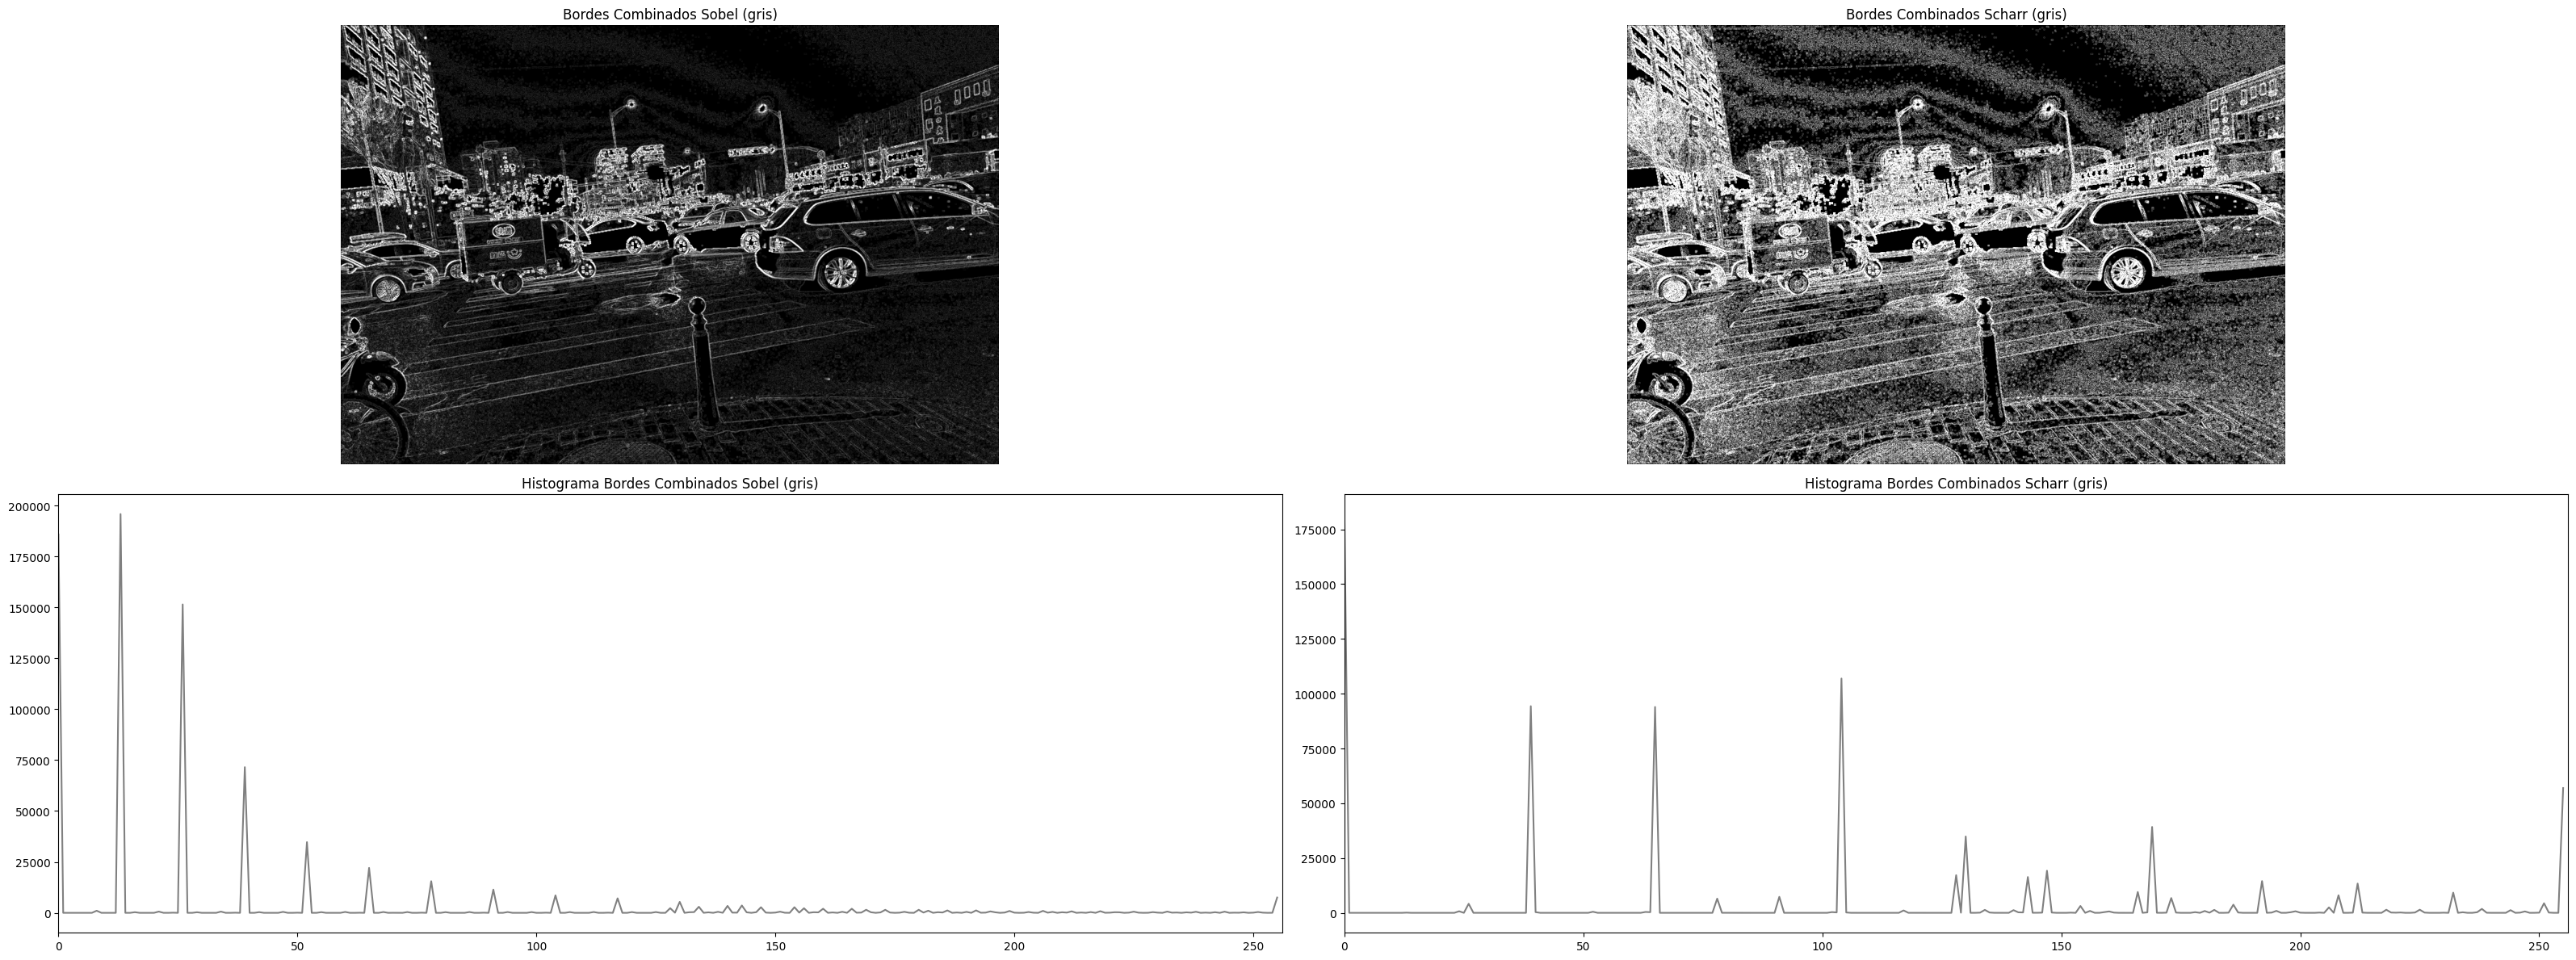

In [58]:
# Sobel 
# Aplicar el filtro Sobel en la dirección x (horizontal) y y (vertical)

# set the kernel size, depending on whether we are using the Sobel
# filter or the Scharr operator, then compute the gradients along
# the x and y axis, respectively

#Filtro SOBEL
ksize = 3  #  Sobel
gXS = cv2.Sobel(brillante1, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gYS = cv2.Sobel(brillante1, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)
#Filtro SCHARR
ksize = -1 # "scharr"
gXC = cv2.Sobel(brillante1, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gYC = cv2.Sobel(brillante1, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)

# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
#Sobel
gXS = cv2.convertScaleAbs(gXS)
gYS = cv2.convertScaleAbs(gYS)
#Scharr
gXC = cv2.convertScaleAbs(gXC)
gYC = cv2.convertScaleAbs(gYC)

# combine the gradient representations into a single image
combinedS = cv2.addWeighted(gXS, 0.5, gYS, 0.5, 0)
combinedC = cv2.addWeighted(gXC, 0.5, gYC, 0.5, 0)

# Crear una cuadrícula de 2x4 para mostrar imágenes y histogramas
fig, axs = plt.subplots(2, 2, figsize=(32,12))

# Desplegar imágenes en gris y sus histogramas en la cuadrícula
show_in_grid(combinedS, 0, 0, title='Bordes Combinados Sobel (gris)')
show_in_grid(combinedC, 0, 1, title='Bordes Combinados Scharr (gris)')

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()

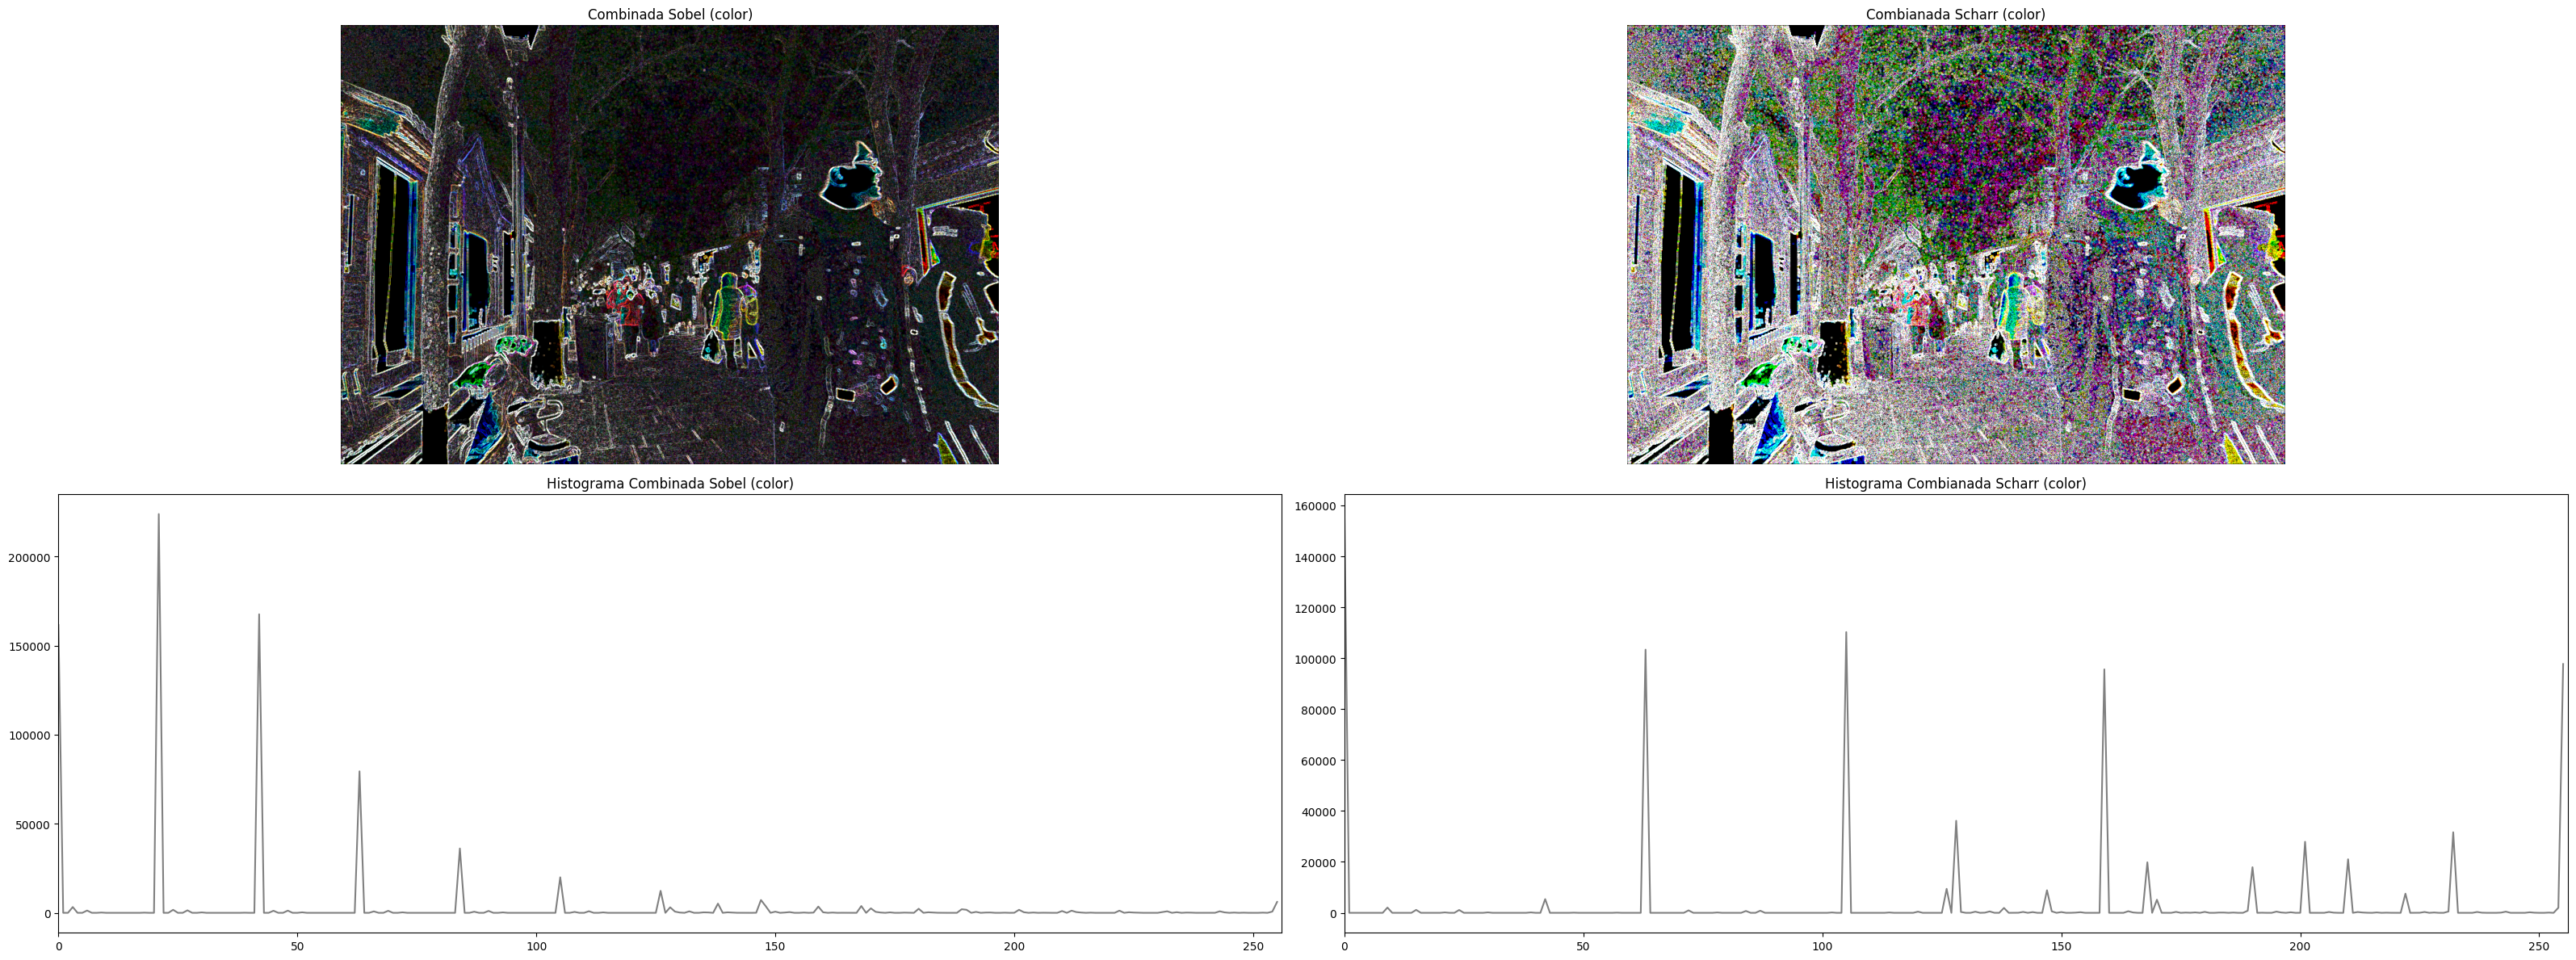

In [59]:
# Sobel 
# Aplicar el filtro Sobel en la dirección x (horizontal) y y (vertical)

# set the kernel size, depending on whether we are using the Sobel
# filter or the Scharr operator, then compute the gradients along
# the x and y axis, respectively

ksize = 3  #  Sobel
gXScolor = cv2.Sobel(brillante3, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gYSColor = cv2.Sobel(brillante3, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)

ksize = -1 # "scharr"
gXCColor = cv2.Sobel(brillante3, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gYCColor = cv2.Sobel(brillante3, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)

# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them
#Sobel
gXScolor = cv2.convertScaleAbs(gXScolor)
gYSColor = cv2.convertScaleAbs(gYSColor)
#Scharr
gXCColor = cv2.convertScaleAbs(gXCColor)
gYCColor = cv2.convertScaleAbs(gYCColor)

# combine the gradient representations into a single image
combinedSColor = cv2.addWeighted(gXScolor, 0.5, gYSColor, 0.5, 0)
combinedCColor = cv2.addWeighted(gXCColor, 0.5, gYCColor, 0.5, 0)

# Crear una cuadrícula de 2x4 para mostrar imágenes y histogramas
fig, axs = plt.subplots(2, 2, figsize=(32,12))

# Desplegar imágenes en gris y sus histogramas en la cuadrícula
show_in_grid(combinedSColor, 0, 0, title='Combinada Sobel (color)')
show_in_grid(combinedCColor, 0, 1, title='Combianada Scharr (color)')

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()

In [7]:
# Aumentar el brillo de la imagen
potenciada1 = potenciar_imagen2(gray1)
potenciada2 = potenciar_imagen2(gray2)
potenciada3 = potenciar_imagen2(img3)
potenciada4 = potenciar_imagen2(img4)


In [ ]:
def reset_controles(b):
    """Reinicia los controles de la interfaz a sus valores por defecto."""
    slider_brillo.value = 0
    slider_contraste.value = 1.0
    slider_gamma.value = 1.0
    chk_sobel.value = False
    chk_scharr.value = False
    chk_negativo.value = False
    chk_log.value = False
    chk_media.value = False
    chk_eqhist.value = False

def adjust_image(imagenes, brightness=0, factor=1, aplicar_sobel=False, aplicar_scharr=False, aplicar_negativo=False, aplicar_log=False, aplicar_media=False, aplicar_gamma=1.0, aplicar_equalizacion=False):

    fig, axs = plt.subplots(2, len(imagenes), figsize=(6*len(imagenes), 8))
    
    for i, img in enumerate(imagenes):
        temp_img = (img.astype(np.int16) + brightness) * factor
        bright_img = np.clip(temp_img, 0, 255).astype(np.uint8)
        media = np.mean(bright_img)

         # Aplicar Sobel si está activo
        if aplicar_sobel:
            sobelx = cv2.Sobel(bright_img, cv2.CV_64F, 1, 0, ksize=3)
            sobely = cv2.Sobel(bright_img, cv2.CV_64F, 0, 1, ksize=3)
            bright_img = cv2.convertScaleAbs(cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0))

        # Aplicar Scharr si está activo
        if aplicar_scharr:
            scharrx = cv2.Scharr(bright_img, cv2.CV_64F, 1, 0)
            scharry = cv2.Scharr(bright_img, cv2.CV_64F, 0, 1)
            bright_img = cv2.convertScaleAbs(cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0))

        # Aplicar negativo si está activo
        if aplicar_negativo:
            bright_img = cv2.bitwise_not(bright_img)
        
        if aplicar_log:
            img_float = bright_img.astype(np.float32)
            c = 255 / np.log(1 + np.max(img_float)) 
            log_image = c * (np.log(img_float + 1)) 
            bright_img = np.array(log_image, dtype = np.uint8) 

        if aplicar_media:
            centered = bright_img - np.mean(bright_img)
            centered_norm = (centered - np.min(centered)) / (np.max(centered) - np.min(centered)) * 255
            bright_img = centered_norm.astype(np.uint8)
        
        if aplicar_gamma > 0.0:
            img_float = bright_img.astype(np.float32) / 255.0
            img_gamma = np.power(img_float, aplicar_gamma)
            bright_img = np.clip(img_gamma * 255.0, 0, 255).astype(np.uint8)

        if aplicar_equalizacion:
            if len(bright_img.shape) == 3 and bright_img.shape[2] == 3:
                bright_img = cv2.cvtColor(bright_img, cv2.COLOR_RGB2GRAY)
            bright_img = cv2.equalizeHist(bright_img)

        axs[0, i].imshow(bright_img, cmap='gray')
        axs[0, i].set_title(f'Imagen {i+1}')
        axs[0, i].axis('off')
        
        if len(bright_img.shape) == 3 and bright_img.shape[2] == 3:
            color_labels = ('b', 'g', 'r')  # orden de canales en OpenCV
            for j, color in enumerate(color_labels):
                hist = cv2.calcHist([bright_img], [j], None, [256], [0,256])
                axs[1, i].plot(hist, color=color)
        else:
            hist = cv2.calcHist([bright_img], [0], None, [256], [0,256])
            axs[1, i].plot(hist, color='gray')
            
        axs[1, i].set_title(f'Histograma {i+1}: (Media: {media:.1f})')
        axs[1, i].set_xlim([0, 256])

    plt.subplots_adjust(hspace=0.5)
    plt.tight_layout()
    plt.show() 


# Sliders
slider_brillo = IntSlider(min=-100, max=100, step=0.5, value=0, description='Brillo', continuous_update=False)
slider_contraste = FloatSlider(min=0.1, max=10.0, step=0.1, value=1.0, description='Contraste', continuous_update=False)
slider_gamma = FloatSlider(min=0.1, max=3.0, step=0.1, value=1.0, description='Gamma', continuous_update=False)

# Checkboxes
chk_sobel = Checkbox(value=False, description='Sobel')
chk_scharr = Checkbox(value=False, description='Scharr')
chk_negativo = Checkbox(value=False, description='Negativo')
chk_log = Checkbox(value=False, description='Logaritmo')
chk_media = Checkbox(value=False, description='Media')
chk_eqhist = Checkbox(value=False, description='Ecualizar histograma')

# Botón de reinicio
btn_reset = Button(description="Reiniciar controles")
btn_reset.on_click(reset_controles)

ui = VBox([
    HBox([slider_brillo, slider_contraste, slider_gamma]),
    HBox([chk_sobel, chk_scharr, chk_negativo, chk_log, chk_media, chk_eqhist]),
    btn_reset
])

out = interactive_output(adjust_image, {
    'imagenes': fixed([gray1, gray2, img3, img4]),
    'brightness': slider_brillo,
    'factor': slider_contraste,
    'aplicar_sobel': chk_sobel,
    'aplicar_scharr': chk_scharr,
    'aplicar_negativo': chk_negativo,
    'aplicar_log': chk_log,
    'aplicar_media': chk_media,
    'aplicar_gamma': slider_gamma,
    'aplicar_equalizacion': chk_eqhist
})

display(ui, out)



Output()